<a href="https://colab.research.google.com/github/aswa09/EVA-4/blob/master/S13/EVA4_S13_yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output

##Mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
os.chdir('./drive/My Drive/Colab Notebooks/S13/YoloV3/')

!ls

 cfg	     models.py	   results.png	 test.py   'ubdivisions=1'      weights
 data	     output	   results.txt	 ting	    utils
 detect.py   __pycache__   runs		 train.py   vim.exe.stackdump


##Train

I first ran:


```
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300
```

which ran until epoch=290, and disconnected

As the latest model gets saved with every iteration, using '--resume' along with the above line continues our process, as seen below: 

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --resume

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-07-05 04:13:53.356955: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.26003e+07 parameters, 6.26003e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 785.33it/s]
Caching images (0.3GB): 100% 500/500 [00:04<00:00, 108.11it/s]
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 1000.07it/s]
C

##convert video to images

In [5]:
os.chdir('./data/customdata/images')

!ls


Bishop	  King	  Magnus_Carlsen_vs_Bill_Gates.mp4  Queen
combined  Knight  Pawn				    Rook


In [6]:
!ffmpeg -i Magnus_Carlsen_vs_Bill_Gates.mp4 -vf fps=30 image-%04d.jpg

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

##Detect

In [7]:
os.chdir('../../..')
!ls


 cfg	     models.py	   results.png	 test.py   'ubdivisions=1'      weights
 data	     output	   results.txt	 ting	    utils
 detect.py   __pycache__   runs		 train.py   vim.exe.stackdump


In [8]:
!python detect.py --conf-thres 0.3 --output output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 225 layers, 6.26003e+07 parameters, 6.26003e+07 gradients
image 1/1389 data/customdata/images/image-0001.jpg: 320x512 1 kings, 1 rooks, 2 bishops, 2 knights, 4 pawns, Done. (0.084s)
image 2/1389 data/customdata/images/image-0002.jpg: 320x512 1 kings, 2 bishops, 3 knights, 5 pawns, Done. (0.084s)
image 3/1389 data/customdata/images/image-0003.jpg: 320x512 1 kings, 1 rooks, 2 bishops, 2 knights, 6 pawns, Done. (0.084s)
image 4/1389 data/customdata/images/image-0004.jpg: 320x512 1 kings, 1 rooks, 2 bishops, 3 knights, 6 pawns, Done. (0.078s)
image 5/1389 data/customdata/images/imag

##Display sample results

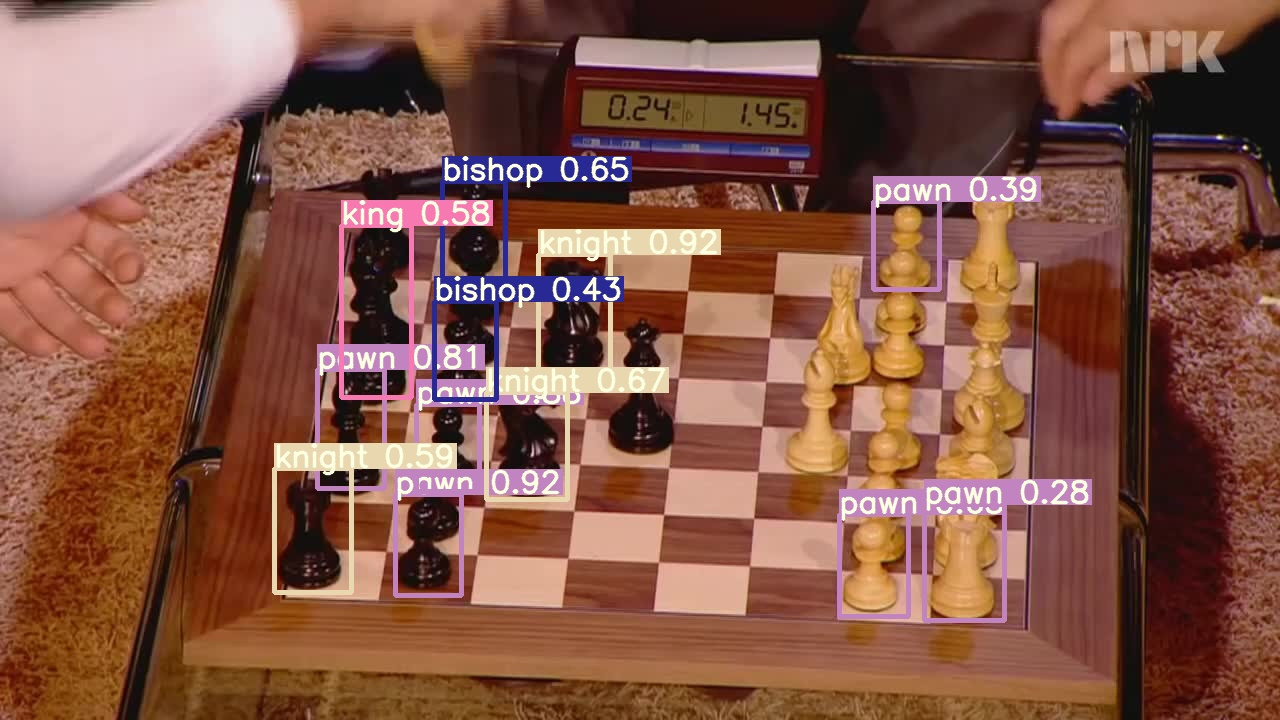

In [13]:
Image(filename='./output/image-0005.jpg', width=600)

##Convert frames to video

In [15]:
!ffmpeg -framerate 30 -i output/image-%04d.jpg -r 30 -y carlsen_vs_bill_gates_od.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena